In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [3]:
df = pd.read_csv('height-weight.csv')

In [4]:
df.head()

Weight  Height
0      45     120
1      58     135
2      48     123
3      60     145
4      70     160

Text(0, 0.5, 'Height')

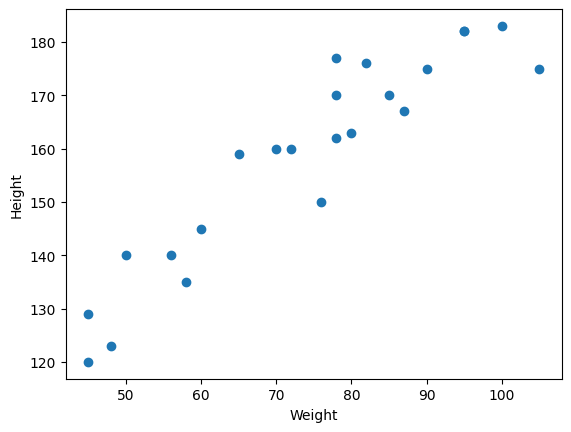

In [6]:
## Plot Scatter plot of data
plt.scatter(df['Weight'], df['Height'])
plt.xlabel('Weight')
plt.ylabel('Height')

In [7]:
## Correlation
df.corr()

Weight    Height
Weight  1.000000  0.931142
Height  0.931142  1.000000

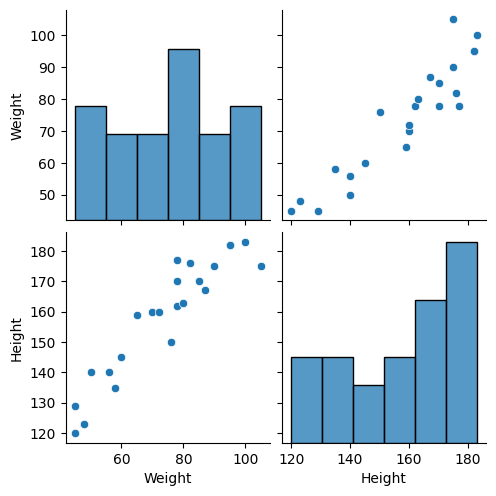

In [8]:
## Searborn for Visualization
import seaborn as sns
sns.pairplot(df)

In [11]:
## Independent and Dependent features
X = df[['Weight']]
y = df['Height']

In [17]:
## Train Test Split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [14]:
X_train.shape

(17, 1)

In [18]:
## Standardization
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [19]:
## Apply linear Regression
from sklearn.linear_model import LinearRegression

regression = LinearRegression()

In [21]:
regression.fit(X_train, y_train)

LinearRegression()

In [24]:
print("Coefficient or Slope: ", regression.coef_)
print("Intercept: ", regression.intercept_)

Coefficient or Slope:  [17.2982057]
Intercept:  156.47058823529412


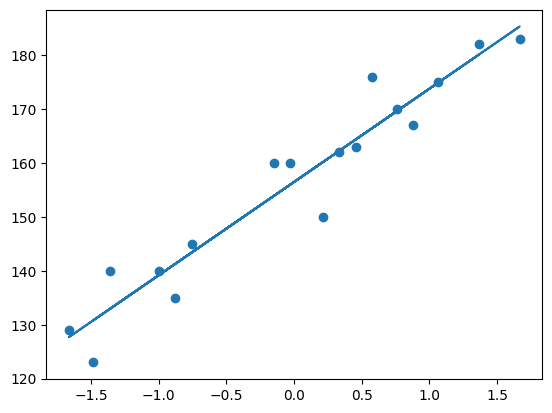

In [26]:
plt.scatter(X_train, y_train)
plt.plot(X_train, regression.predict(X_train))

In [27]:
## Prediction for test data
y_pred = regression.predict(X_test)

In [37]:
## Performance Metric
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [38]:
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mse)
score = r2_score(y_test, y_pred)

In [39]:
print(mse)
print(mae)
print(rmse)
print(score)

114.84069295228699
9.66512588679501
10.716374991212605
0.7360826717981276


In [40]:
## OLS Linear Regression
import statsmodels.api as sm

In [41]:
model = sm.OLS(y_train, X_train).fit()

In [42]:
prediction = model.predict(X_test)
print(prediction)

[  5.79440897   5.79440897 -28.78711691  23.60913442  -7.82861638
  34.08838469]


In [43]:
model.summary()

C:\Users\Zeeshan Altaf\AppData\Local\Programs\Python\Python311\Lib\site-packages\scipy\stats\_stats_py.py:1971: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=17
  k, _ = kurtosistest(a, axis)


<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                 Height   R-squared (uncentered):                   0.012
Model:                            OLS   Adj. R-squared (uncentered):             -0.050
Method:                 Least Squares   F-statistic:                             0.1953
Date:                Mon, 08 Jul 2024   Prob (F-statistic):                       0.664
Time:                        17:24:20   Log-Likelihood:                         -110.03
No. Observations:                  17   AIC:                                      222.1
Df Residuals:                      16   BIC:                                      222.9
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1            17.2982     39.138      0.442      0.664     -65.671     100.267
==============================================================================
Omnibus:                        0.135   Durbin-Watson:                   0.002
Prob(Omnibus):                  0.935   Jarque-Bera (JB):                0.203
Skew:                          -0.166   Prob(JB):                        0.904
Kurtosis:                       2.581   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""